In [1]:
#import sys
#!{sys.executable} -m pip install matplotlib

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Coverage plots

Let us consider the following function which applies a linear model to the given data. 
Specifically, given a "model" vector containing the model coefficients $(a,b)$ and a $n \times 2$ "data" matrix  containing the data points to be classified, the function outputs a vector $\mathbf{z}$, $|\mathbf{z}| = n$ of booleans where $z_i$ is `True` if $a \cdot x_{i,1} + b \cdot x_{i,2} \geq 0$, it is `False` otherwise.

In [3]:
def apply_linear_model(model, data):
    return np.dot(data, np.transpose(model)) > 0

Let us define `data` by generating $1000$ points drawn uniformly from $\mathcal{X} = [-100,100]^2$.

In [4]:
data = np.random.randint(-100,100,[1000,2])
data

array([[  20,  -23],
       [ -30,   26],
       [ -39,  -37],
       ...,
       [  96, -100],
       [ -39,   85],
       [  77,   96]])

and let target_labels be the labeling output by applying `apply_linear_model` with our target model: $4x -y > 0$

In [5]:
target_model = [4.,-1.]
target_labels = apply_linear_model(target_model, data)
target_labels

array([ True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True, False, False,
        True, False,  True, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
       False,  True,  True,  True, False,  True, False, False, False,
        True,  True, False,  True,  True, False,  True, False,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False,  True, False, False,  True,  True, False,  True, False,
        True, False, False,  True,  True, False, False, False,  True,
       False, False,

By using matplotlib.pyplot module it is easy to plot the generated points onto a 2D plot:

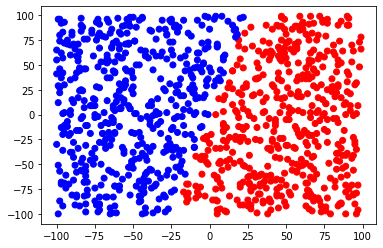

In [6]:
colors = ['r' if l else 'b' for l in target_labels]
plt.scatter(data[:,0], data[:,1], color=colors)

Finally let us now generate at random 100 linear models with coefficients in $[-5,5]$:

In [7]:
models = (np.random.rand(100,2) - 0.5) * 10
models

array([[-0.16536227, -3.72901621],
       [-2.38352925, -1.39336485],
       [ 0.03855045,  4.37793609],
       [-4.95155325, -3.9761257 ],
       [ 2.24025685, -4.98102827],
       [ 0.39630178,  1.98575184],
       [ 3.09261916,  1.84892472],
       [-4.78519537, -4.49344664],
       [ 3.08315648,  0.8061572 ],
       [-0.47386004, -2.03251811],
       [ 3.42745509,  0.55839998],
       [ 2.62062661,  1.45661464],
       [-0.81771186,  2.17311668],
       [-3.09099662,  3.45077114],
       [ 0.7654651 ,  2.73808409],
       [-0.44864827,  1.5976057 ],
       [-4.33506823,  0.75638371],
       [-4.72043852, -3.55867851],
       [-4.50174445, -1.19895569],
       [ 0.57816028, -0.94073029],
       [ 3.05554509, -0.30774519],
       [-0.42321848,  2.30297938],
       [ 2.37126933, -1.5099196 ],
       [-0.07887691,  3.65301079],
       [-4.0188981 , -3.54649228],
       [-1.82498169,  4.3980317 ],
       [ 0.83389953, -3.13610614],
       [ 2.53581613,  1.10029167],
       [ 2.84488762,

# Exercise

1. Write a function that, taken two list of labellings build the corresponding confusion matrix [[1](#hint1)];
1. For each model in `models` plot the [FP,TP] pairs on a scatter plot;
1. Just looking at the plot: which is the best model in the pool?
1. Find the model with the best accuracy [[2](#hint2)] and compare it with the target model, is it close? Is it the model you would have picked up visually from the scatter plot?
1. If everything is ok, you should have found a pretty good model for our data. It fits the data quite well and it is quite close to the target model. Did you expect this? If so, why? If not so, why not?

<a name="hint1">Hint 1:</a> it may be helpful to have a way to map TRUE to 0, FALSE to 1 and to use these values as indices in the confusion matrix. 

<a name="hint2">Hint 2:</a> one way to proceed is to build a function `accuracy`, use the `map` function to calculate the accuracies of all the models, and then apply the `numpy.argmax` to retrieve the index of the best model.

### 1. Write a function that, taken two list of labellings build the corresponding confusion matrix

Definiamo il metodo `generate_confusion_matrix` che prende in input i `true_value` e `predicted_value` e crea la matrice di confusione.

##### Esempio `true_value[i]=1=FALSE` e `predicted_value[i]=0=TRUE`
In base a questi valori significa che abbiamo fatto un errore di false positive e dunque va incrementato il relativo contatore nella matrice di confusione.

Gli `FP`, nella matrice di confusione, sono nella posizone `[1][0]` quindi dobbiamo semplicemente fare:

`confusion_matrix[true_value[i], predicted_value[i]] += 1`

Lo stesso ragionamento si può applicare per tutti gli altri tre casi.


In [14]:
def generate_confusion_matrix(true_value, predicted_value):
    true_value = 1 - true_value.astype(int) #converte TRUE FALSE in 0 1
    predicted_value = 1 - predicted_value.astype(int) #converte TRUE FALSE in 0 1

    number_of_classes = len(np.unique(true_value)) # identifica il numero di classi diverse
    confusion_matrix = np.zeros((number_of_classes, number_of_classes)) # inizializza la confusion matrix

    for i in range(len(true_value)):
        confusion_matrix[true_value[i], predicted_value[i]] += 1 # aggiorna la cella corretta

    return confusion_matrix


# Esempio
true_value = np.array([True, False, False])
predicted_value = np.array([True, False, False])

generate_confusion_matrix(true_value, predicted_value)

array([[1., 0.],
       [0., 2.]])

### 2. For each model in `models` plot the [FP,TP] pairs on a scatter plot

[ True False False  True  True  True  True  True  True False  True  True
 False False  True  True False False  True False  True False  True False
  True  True False  True  True  True  True  True  True  True False False
 False  True  True False False False False False  True  True  True  True
 False False  True  True False  True False  True  True  True False  True
 False False False  True  True False  True  True False  True False  True
 False  True  True  True False  True  True  True False  True  True  True
 False  True  True False False False  True False False False False False
 False  True False False False  True False  True False False  True  True
 False  True False False  True  True False  True False  True False False
  True  True False False False  True False False False  True  True  True
 False False  True False  True False False  True False False False  True
  True  True False  True False  True  True  True  True False  True False
  True  True False  True  True False  True  True  T

[ True False False  True  True  True  True  True  True False  True  True
 False False  True  True False False  True False  True False  True False
  True  True False  True  True  True  True  True  True  True False False
 False  True  True False False False False False  True  True  True  True
 False False  True  True False  True False  True  True  True False  True
 False False False  True  True False  True  True False  True False  True
 False  True  True  True False  True  True  True False  True  True  True
 False  True  True False False False  True False False False False False
 False  True False False False  True False  True False False  True  True
 False  True False False  True  True False  True False  True False False
  True  True False False False  True False False False  True  True  True
 False False  True False  True False False  True False False False  True
  True  True False  True False  True  True  True  True False  True False
  True  True False  True  True False  True  True  T

[ True False False  True  True  True  True  True  True False  True  True
 False False  True  True False False  True False  True False  True False
  True  True False  True  True  True  True  True  True  True False False
 False  True  True False False False False False  True  True  True  True
 False False  True  True False  True False  True  True  True False  True
 False False False  True  True False  True  True False  True False  True
 False  True  True  True False  True  True  True False  True  True  True
 False  True  True False False False  True False False False False False
 False  True False False False  True False  True False False  True  True
 False  True False False  True  True False  True False  True False False
  True  True False False False  True False False False  True  True  True
 False False  True False  True False False  True False False False  True
  True  True False  True False  True  True  True  True False  True False
  True  True False  True  True False  True  True  T

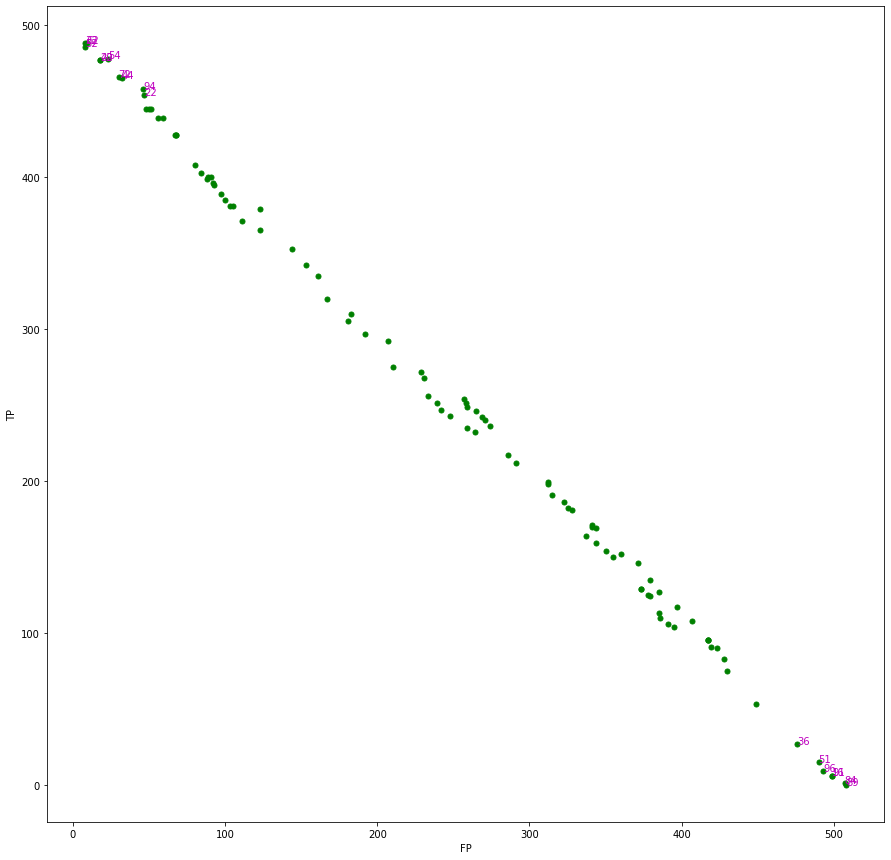

In [9]:
fp_list = np.zeros((len(models))) # lista di FP per ogni modello
tp_list = np.zeros((len(models))) # lista di TP per ogni modello
for i, model in enumerate(models):
    predicted_labels = apply_linear_model(model, data) # label predette dal "model" corrente
    tp_fp = generate_confusion_matrix(target_labels, predicted_labels)[:, 0] # prendiamo solo TP ed FP dalla conf-matrix
    tp_list[i] = tp_fp[0] # Aggiungiamo la TP del modello corrente alla lista delle TP
    fp_list[i] = tp_fp[1]

plt.figure(figsize=(15, 15))
plt.plot(fp_list, tp_list, 'go', alpha=1, markersize=5)
plt.xlabel("FP")
plt.ylabel("TP")

# Annotiamo solamente i modelli più rilevanti
for i, _ in enumerate(fp_list):
    if fp_list[i] < 50 and tp_list[i] > 450 or tp_list[i] < 50 and fp_list[i] > 450:
        plt.annotate(i, (fp_list[i], tp_list[i]), size=10, color='m')

### 3. Just looking at the plot: which is the best model in the pool?

Per evidenziare i migliori modelli abbiamo individuato le porzioni del plot soprastante che sono più vicine al ROC heaven e ROC hell in quanto tali modelli risulteranno essere i più interessanti.

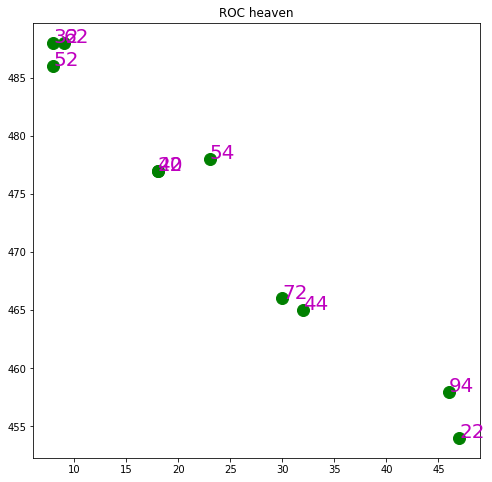

In [10]:
roc_heaven_point = []
roc_hell_point = []
for i in range(len(tp_list)):
    # Salviamo solamente i modelli/punti più vicini al roc heaven
    if fp_list[i] < 50 and tp_list[i] > 450:
        roc_heaven_point.append([fp_list[i], tp_list[i], i])
    # Salviamo solamente i modelli/punti più vicini al roc hell
    if fp_list[i] > 450 and tp_list[i] < 50:
        roc_hell_point.append([fp_list[i], tp_list[i], i])
        
roc_heaven_point = np.array(roc_heaven_point) # Trasformiamo in numpy matrix
roc_hell_point = np.array(roc_hell_point)

plt.figure(figsize=(8, 8))
plt.title("ROC heaven")
plt.plot(roc_heaven_point[:,0], roc_heaven_point[:,1], 'go', alpha=1, markersize=12)
for _, point in enumerate(roc_heaven_point):
    plt.annotate(int(point[2]), (point[0], point[1]), size=20, color='m')

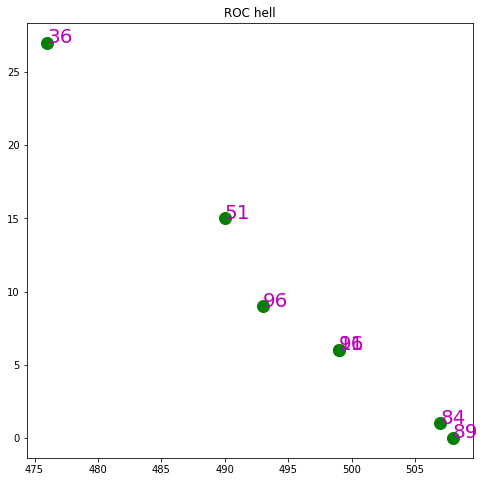

In [11]:
plt.figure(figsize=(8, 8))
plt.title("ROC hell")
plt.plot(roc_hell_point[:,0], roc_hell_point[:,1], 'go', alpha=1, markersize=12)
for _, point in enumerate(roc_hell_point):
    plt.annotate(int(point[2]), (point[0], point[1]), size=20, color='m')

### 4. Find the model with the best accuracy and compare it with the target model, is it close? Is it the model you would have picked up visually from the scatter plot?

In [12]:
def accuracy(sum_of_tp_tn, total):
    # accuracy = (TP + TN) / Pos + Neg
    return sum_of_tp_tn / total

accuracy_list = []
for i, model in enumerate(models):
    predicted_labels = apply_linear_model(model, data)
    confusion_matrix = generate_confusion_matrix(target_labels, predicted_labels)
    # np.trace prende gli elementi sulla diagonale della matrice di confusione
    accuracy_list.append(accuracy(np.trace(confusion_matrix), len(predicted_labels)))

# Troviamo i 5 migliori modelli (in base all'accuratezza)
best_problems = []
for i in range(5):
    best_accuracy, best_model = accuracy_list[np.argmax(accuracy_list)], np.argmax(accuracy_list)
    print("Il {}° migliore modello è il numero {} con un'accuratezza di: {}".format(i+1, best_model, best_accuracy))
    #models[best_model]
    best_problems.append([best_model, best_accuracy])
    accuracy_list[best_model] = 0

[ True False False  True  True  True  True  True  True False  True  True
 False False  True  True False False  True False  True False  True False
  True  True False  True  True  True  True  True  True  True False False
 False  True  True False False False False False  True  True  True  True
 False False  True  True False  True False  True  True  True False  True
 False False False  True  True False  True  True False  True False  True
 False  True  True  True False  True  True  True False  True  True  True
 False  True  True False False False  True False False False False False
 False  True False False False  True False  True False False  True  True
 False  True False False  True  True False  True False  True False False
  True  True False False False  True False False False  True  True  True
 False False  True False  True False False  True False False False  True
  True  True False  True False  True  True  True  True False  True False
  True  True False  True  True False  True  True  T

[ True False False  True  True  True  True  True  True False  True  True
 False False  True  True False False  True False  True False  True False
  True  True False  True  True  True  True  True  True  True False False
 False  True  True False False False False False  True  True  True  True
 False False  True  True False  True False  True  True  True False  True
 False False False  True  True False  True  True False  True False  True
 False  True  True  True False  True  True  True False  True  True  True
 False  True  True False False False  True False False False False False
 False  True False False False  True False  True False False  True  True
 False  True False False  True  True False  True False  True False False
  True  True False False False  True False False False  True  True  True
 False False  True False  True False False  True False False False  True
  True  True False  True False  True  True  True  True False  True False
  True  True False  True  True False  True  True  T

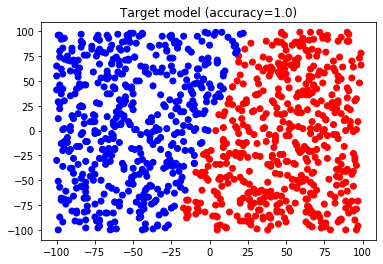

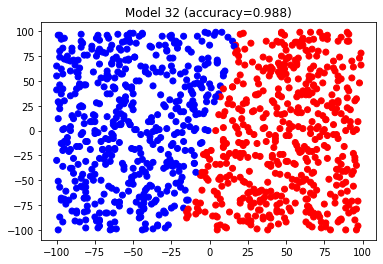

[[32, 0.988], [62, 0.987], [52, 0.986], [20, 0.967], [42, 0.967]]

In [13]:
colors = ['r' if l else 'b' for l in target_labels]
plt.scatter(data[:,0], data[:,1], color=colors)
plt.title("Target model (accuracy=1.0)")
plt.show()

colors = ['r' if l else 'b' for l in apply_linear_model(models[best_problems[0][0]], data)]
plt.scatter(data[:,0], data[:,1], color=colors)
plt.title("Model {} (accuracy={})".format(best_problems[0][0],best_problems[0][1]))
plt.show()

best_problems


### 5. If everything is ok, you should have found a pretty good model for our data. It fits the data quite well and it is quite close to the target model. Did you expect this? If so, why? If not so, why not?

Il risultato visualizzato dopo la computazione risulta essere conforme alle nostre aspettative, infatti, nonostante i modelli siano stati generati randomicamente, già dal punto 2 avevamo potuto apprezzare come alcuni fossero particolarmente promettenti (quelli prossimi a ROC heaven e ROC hell).

Il calcolo dell'accuratezza ci ha infatti confermato le nostre aspettative mostrando come diversi modelli avessero un'accuratezza superiore al 95%. Concludiamo dunque che, generando un numero sufficiente di modelli (e.g., 100), sia possibile approssimare in maniera il modello che ha generato il training set.